In [42]:
import pandas as pd

In [43]:
pd.read_csv('listings_cleaned.csv')

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price
0,271975,Vidigal,Entire home/apt,4,1.0,2.0,2.0,236.0
1,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0
2,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0
3,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0
4,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0
...,...,...,...,...,...,...,...,...
39494,1319593870376466401,Copacabana,Entire home/apt,4,2.0,1.0,2.0,957.0
39495,1319611826461021550,Jacarezinho,Entire home/apt,8,1.0,1.0,1.0,288.0
39496,1319620401959854025,Copacabana,Entire home/apt,6,1.0,1.0,4.0,672.0
39497,1319650312466603776,Ipanema,Entire home/apt,6,1.5,2.0,1.0,1083.0


In [44]:
pd.read_csv('reviews.csv')

,id,number_of_reviews,review_scores_rating
0,272335,367,4.920000
1,272631,32,5.000000
2,273363,5,5.000000
3,273463,654,4.830000
4,273496,60,4.800000
...,...,...,...
32690,842292,68,4.760000
32691,730997,119,4.760000
32692,857217,0,4.812309
32693,749237,53,4.810000


In [45]:
df = pd.merge(
    pd.read_csv('listings_cleaned.csv'),
    pd.read_csv('reviews.csv'),
    on='id'
    ) #junção das duas bases

In [46]:
df.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.920000
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.000000
2,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0,4.812309
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.000000
4,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654,4.830000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      32695 non-null  int64  
 1   neighbourhood_cleansed  32695 non-null  object 
 2   room_type               32695 non-null  object 
 3   accommodates            32695 non-null  int64  
 4   bathrooms               32695 non-null  float64
 5   bedrooms                32695 non-null  float64
 6   beds                    32695 non-null  float64
 7   price                   32695 non-null  float64
 8   number_of_reviews       32695 non-null  int64  
 9   review_scores_rating    32695 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 2.5+ MB


In [48]:
df.describe()

,id,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
count,3.269500e+04,32695.00000,32695.000000,32695.000000,32695.000000,32695.000000,32695.000000,32695.000000
mean,6.936934e+17,3.75507,1.390427,1.417250,2.194984,782.973788,24.132100,4.816146
std,5.187758e+17,1.95623,0.736872,0.870945,1.680987,522.337706,46.390162,0.296394
min,1.787800e+04,1.00000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000
25%,4.311751e+07,2.00000,1.000000,1.000000,1.000000,386.000000,1.000000,4.812309
50%,8.605216e+17,4.00000,1.000000,1.000000,2.000000,671.000000,6.000000,4.830000
75%,1.147848e+18,4.00000,2.000000,2.000000,3.000000,1036.000000,26.000000,5.000000
max,1.320520e+18,16.00000,20.000000,26.000000,50.000000,10000.000000,710.000000,5.000000


In [49]:
df.isnull().sum()

,0
id,0
neighbourhood_cleansed,0
room_type,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,0
number_of_reviews,0
review_scores_rating,0


In [50]:
drop_id = df.drop(['id'], axis=1)

<Axes: >

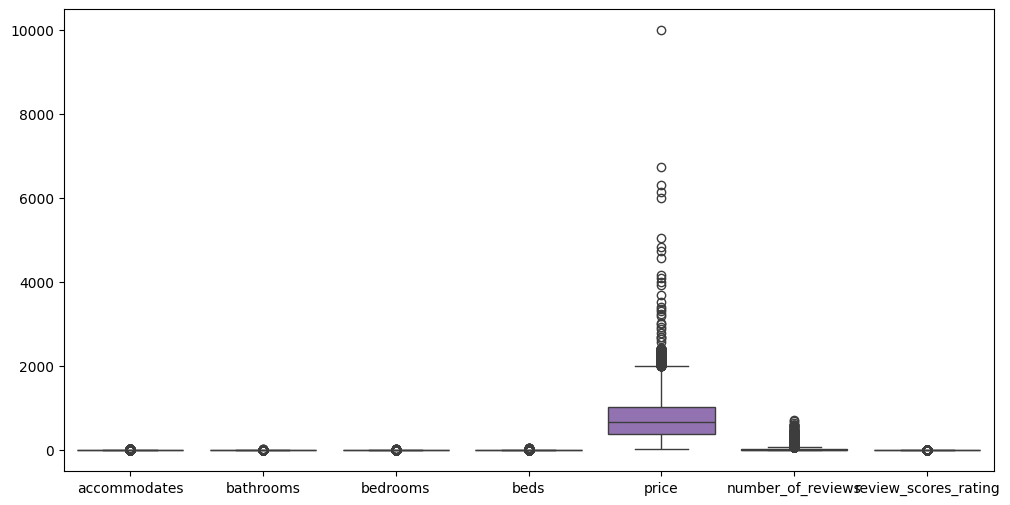

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(drop_id)

In [52]:
def remover_outliers_iqr(drop_id, coluna):
    Q1 = drop_id[coluna].quantile(0.25)
    Q3 = drop_id[coluna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = ~((drop_id[coluna] < (Q1 - 1.5 * IQR)) | (drop_id[coluna] > (Q3 + 1.5 * IQR)))
    return drop_id[filtro]

df_limpo = remover_outliers_iqr(drop_id, "price")
df_limpo = remover_outliers_iqr(df_limpo, "number_of_reviews")

print(f'Antes: {drop_id.shape[0]}')
print(f'depois: {df_limpo.shape[0]}') #Utilizando o método  IQR para remover outliers

Antes: 32695
depois: 28244


In [53]:
df_limpo['room_type_encoded'] = df_limpo['room_type'].astype('category').cat.codes

In [61]:
mapeamento = pd.DataFrame({
    'room_type': df_limpo['room_type'].astype('category').cat.categories,
    'codigo': range(len(df_limpo['room_type'].astype('category').cat.categories))
})

print(mapeamento)

         room_type  codigo
0  Entire home/apt       0
1       Hotel room       1
2     Private room       2
3      Shared room       3


# Revisão

In [62]:
df_limpo.head()

,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_encoded
1,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.00,2
3,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.00,2
5,Leblon,Entire home/apt,6,2.5,2.0,5.0,703.0,60,4.80,0
6,Santa Teresa,Private room,1,1.0,1.0,1.0,59.0,4,4.50,2
7,Santa Teresa,Entire home/apt,3,1.0,1.0,2.0,225.0,48,4.92,0


In [55]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28244 entries, 1 to 32694
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  28244 non-null  object 
 1   room_type               28244 non-null  object 
 2   accommodates            28244 non-null  int64  
 3   bathrooms               28244 non-null  float64
 4   bedrooms                28244 non-null  float64
 5   beds                    28244 non-null  float64
 6   price                   28244 non-null  float64
 7   number_of_reviews       28244 non-null  int64  
 8   review_scores_rating    28244 non-null  float64
 9   room_type_encoded       28244 non-null  int8   
dtypes: float64(5), int64(2), int8(1), object(2)
memory usage: 2.2+ MB


In [56]:
df_limpo.describe()

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_encoded
count,28244.000000,28244.000000,28244.000000,28244.000000,28244.000000,28244.000000,28244.000000,28244.000000
mean,3.693209,1.377408,1.407556,2.141835,733.664531,11.159432,4.813176,0.449334
std,1.918189,0.726806,0.850876,1.652254,459.842128,15.101086,0.312705,0.848352
min,1.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,367.000000,0.000000,4.812309,0.000000
50%,4.000000,1.000000,1.000000,2.000000,643.000000,4.000000,4.820000,0.000000
75%,4.000000,2.000000,2.000000,3.000000,1000.000000,16.000000,5.000000,0.000000
max,16.000000,20.000000,26.000000,50.000000,2011.000000,63.000000,5.000000,3.000000


In [57]:
df_limpo.columns

Index(['neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'number_of_reviews',
       'review_scores_rating', 'room_type_encoded'],
      dtype='object')

<Axes: >

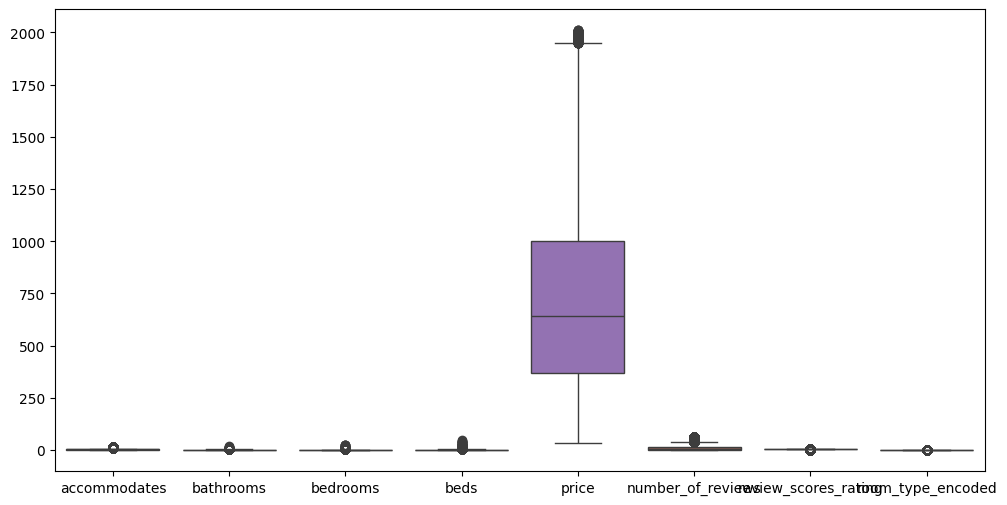

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(df_limpo)